#Take a look at the Dataset and Visualizing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Traffic.csv")
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [ ]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [ ]:

numerical_values = df[['CarCount','BikeCount','BusCount','TruckCount','Total']]
correlation_matrix = numerical_values.corr()
print(correlation_matrix)

            CarCount  BikeCount  BusCount  TruckCount     Total
CarCount    1.000000   0.708243  0.658417   -0.615043  0.971507
BikeCount   0.708243   1.000000  0.577671   -0.607720  0.781879
BusCount    0.658417   0.577671  1.000000   -0.558372  0.758970
TruckCount -0.615043  -0.607720 -0.558372    1.000000 -0.545390
Total       0.971507   0.781879  0.758970   -0.545390  1.000000


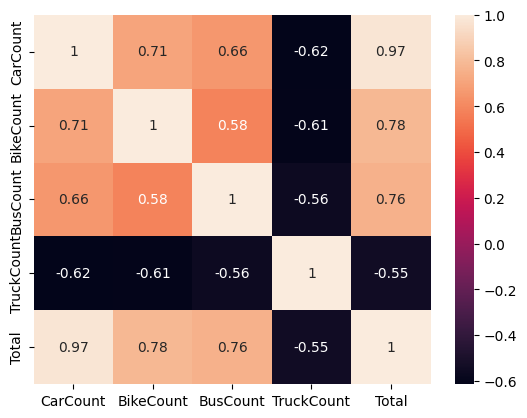

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True,)
plt.show()

<Axes: xlabel='Day of the week', ylabel='Total'>

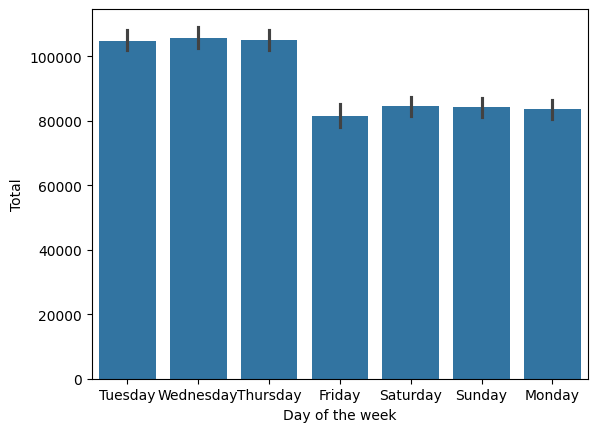

In [ ]:
sns.barplot(x = 'Day of the week', y = 'Total', data = df ,estimator='sum')

<Axes: xlabel='CarCount', ylabel='Day of the week'>

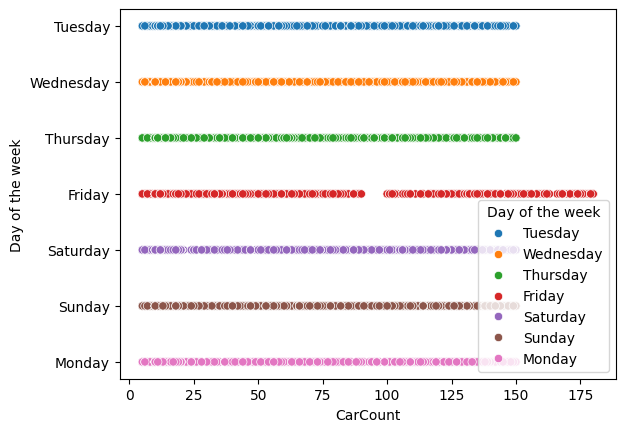

In [ ]:
sns.scatterplot(data=df, x="CarCount", y="Day of the week", hue="Day of the week")

In [ ]:
df.sample(10)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
4533,5:15:00 AM,26,Thursday,64,27,5,5,101,low
4322,12:30:00 AM,24,Tuesday,20,4,0,32,56,normal
3676,7:00:00 AM,17,Tuesday,113,11,32,1,157,high
3531,6:45:00 PM,15,Sunday,72,12,14,32,130,high
3142,5:30:00 PM,11,Wednesday,118,23,38,10,189,heavy
3684,9:00:00 AM,17,Tuesday,132,18,32,2,184,heavy
548,5:00:00 PM,15,Sunday,116,15,33,20,184,heavy
2264,2:00:00 PM,2,Thursday,79,12,22,14,127,normal
3517,3:15:00 PM,15,Sunday,18,27,19,6,70,normal
4843,10:45:00 AM,29,Sunday,54,24,37,20,135,high


#Adding queries, Selecting from data, setting indexes




In [ ]:
df.iloc[0:3]

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal


In [ ]:
df.loc[0:3 ,['CarCount','BikeCount','BusCount','TruckCount','Total']]

,CarCount,BikeCount,BusCount,TruckCount,Total
0,13,2,2,24,41
1,14,1,1,36,52
2,10,2,2,32,46
3,10,2,2,36,50


In [ ]:
#Selecting Time, Date, and Total Coloumns
df_TotalPerTime = df[['Time','Day of the week','Total']]    # Selecting Coloumns
df_TotalPerTime.rename(columns={'Total':'Number_of_Vehicles','Day of the week':'Week_Days'}, inplace=True) # Rename
df_TotalPerTime = df_TotalPerTime.set_index(['Week_Days','Time','Number_of_Vehicles']) # Set index
df_TotalPerTime.iloc[0:20].query('Number_of_Vehicles > 70')  # Querying Times where vehicles>70 in the first 20 rows

<ipython-input-28-a4298a24cdaf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TotalPerTime.rename(columns={'Total':'Number_of_Vehicles','Day of the week':'Week_Days'}, inplace=True) # Rename


Empty DataFrame
Columns: []
Index: [(Tuesday, 4:00:00 AM, 102), (Tuesday, 4:15:00 AM, 104), (Tuesday, 4:30:00 AM, 111), (Tuesday, 4:45:00 AM, 98)]

#Grouping and Aggregation

In [ ]:
df_total = df.groupby(['Day of the week','Time'])

print(df_total)